In [66]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()

# Loading data

In [41]:
data = pd.read_csv('exams.csv')
data[["exam_1", "exam_2"]] = scaler.fit_transform(data[["exam_1", "exam_2"]])

In [42]:
data.columns

Index(['exam_1', 'exam_2', 'admitted'], dtype='object')

# Visualization part 1 

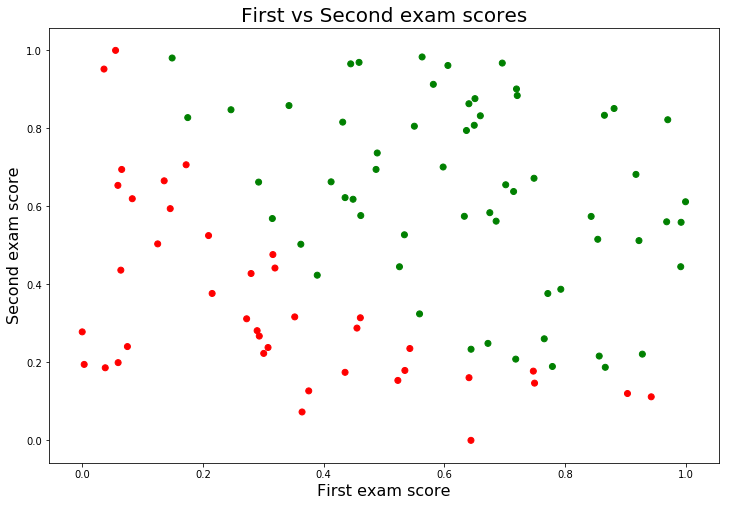

In [43]:
plt.figure(figsize = (12, 8))
my_color = np.where(data['admitted'] == 1, 'green', 'red')
plt.scatter(x = data['exam_1'], y = data['exam_2'], color = my_color)

plt.title('First vs Second exam scores', fontsize = 20)
plt.xlabel('First exam score', fontsize = 16)
plt.ylabel('Second exam score', fontsize = 16)

plt.show()

# Sigmoid Function

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
sigmoid(0.458)

0.6125396134409151

# Cost Function

In [45]:
def cost(x, y, theta):
    h = sigmoid(np.matmul(x, theta))
    return -1/len(x)*(y*np.log(h) + (1 - y)*np.log(1 - h)).sum()

# Gradient Descent

In [46]:
def gradient_descent(x, y, alpha=0.01, iters=100000):    
    theta = np.ndarray(x.shape[1]+1)
    x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    cost_history = []
    
    for i in range(iters):
        h = sigmoid(np.matmul(x, theta))
        gradient = np.matmul(x.transpose(), h-y) / len(x)
        theta = theta - alpha * gradient
        cost_history.append(cost(x, y, theta))
        
    return theta, cost_history

In [47]:
x = data[["exam_1", "exam_2"]].values
y = data["admitted"].values
theta, cost_history = gradient_descent(x, y)

# Visualization part 2

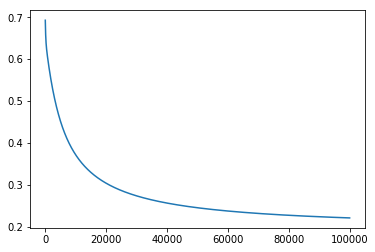

In [48]:
plt.plot(cost_history)
plt.show()

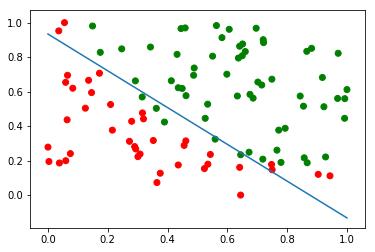

In [49]:
my_color = np.where(data['admitted'] == 1, 'green', 'red')
plt.scatter(x = data['exam_1'], y = data['exam_2'], color = my_color)

plt.plot([0, 1], [-theta[2]/theta[1], -(theta[2] + theta[0])/theta[1]])

plt.show()

# Accuracy test

In [50]:
data["prob"] = sigmoid(np.matmul(np.append(data[["exam_1", "exam_2"]].values, 
               np.ones((data[["exam_1", "exam_2"]].values.shape[0], 1)), axis=1), theta))

print("Accuracy score: {:.0f}%".format(accuracy_score(data["admitted"], round(data["prob"]))*100))

Accuracy score: 89%


# New data predictions

In [62]:
df = pd.DataFrame({"ex1": [55, 40], "ex2": [70, 60], "isAdmitted": [1, 0]})

df["prob"] = sigmoid(np.matmul(np.append(scaler.transform(df[["ex1", "ex2"]].values), 
                    np.ones((scaler.transform(df[["ex1", "ex2"]].values).shape[0], 1)), axis=1), theta))
df["pred"] = round(df["prob"])
df

,ex1,ex2,isAdmitted,prob,pred
0,55,70,1,0.553488,1.0
1,40,60,0,0.043990,0.0


# Logistic Regression with Sklearn

In [70]:
test = LogisticRegression(penalty='l2', C=1) # regularization = penalty, C - strength of regulatization, smaller = stronger
test.fit(data[["exam_1", "exam_2"]].values, data["admitted"].values)
print("Training accuracy: {:.0f}%".format(test.score(data[["exam_1", "exam_2"]].values, data["admitted"].values)*100))

Training accuracy: 87%


c:\users\nihad atakishiyev\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
df = pd.DataFrame({"ex1": [55, 40], "ex2": [70, 60], "isAdmitted": [1, 0]})
dt = df[["ex1", "ex2"]].values
df["pred"] = test.predict(dt)
df["prob"] = test.predict_proba(dt)[1]
df

,ex1,ex2,isAdmitted,pred,prob
0,55,70,1,1,0.622664
1,40,60,0,0,0.377336
